In [1]:
import matplotlib.pyplot as plt
from Objects.Simulation import Simulation
import numpy as np
import pickle
import pandas as pd
%pylab
%matplotlib inline

# Create cycler object. Use any styling from above you please
monochromeWithMarker = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':', '-.']) * cycler('marker', [ '.' ,'^']))
monochromeNoMarker = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':', '-.']) * cycler('marker', [',']))
monochrome = monochromeNoMarker.concat(monochromeWithMarker)
# Print examples of output from cycler object. 
# A cycler object, when called, returns a `iter.cycle` object that iterates over items indefinitely
print("number of items in monochrome:", len(monochrome))
# Overriding styles for current script
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.prop_cycle'] = monochrome
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['figure.figsize'] = (12,5)
mpl.rcParams['figure.dpi']= 300
MARKEREVERY = 50

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib
number of items in monochrome: 12


In [2]:
# Create cycler object. Use any styling from above you please
monochromeWithMarker = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':', '-.']) * cycler('marker', [ '.' ,'^']))
monochromeNoMarker = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':', '-.']) * cycler('marker', [',']))
monochrome = monochromeNoMarker.concat(monochromeWithMarker)
# Print examples of output from cycler object. 
# A cycler object, when called, returns a `iter.cycle` object that iterates over items indefinitely
print("number of items in monochrome:", len(monochrome))
# Overriding styles for current script
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.prop_cycle'] = monochrome
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['figure.figsize'] = (12,5)
mpl.rcParams['figure.dpi']= 300
MARKEREVERY = 50

number of items in monochrome: 12


In [3]:
subFolder = "SG1/"
av_avg_delay = pd.read_csv(subFolder+'SG1_av_avg_delay.csv',index_col=0)* 1000
av_max_delay = pd.read_csv(subFolder+'SG1_av_max_delay.csv',index_col=0)* 1000
av_vdr = pd.read_csv(subFolder+'SG1_av_vdr.csv',index_col=0)
cav_avg_delay = pd.read_csv(subFolder+'SG1_cav_avg_delay.csv',index_col=0)* 1000
cav_max_delay = pd.read_csv(subFolder+'SG1_cav_max_delay.csv',index_col=0)* 1000
cav_vdr = pd.read_csv(subFolder+'SG1_cav_vdr.csv',index_col=0)
xlabel = "maximum acceleration"
ylabel="maximum deceleration"


In [4]:
human_avg_delay,human_max_delay,human_vdr = 0.09277343332193655, 0.23363514456212436, 1800.0
human_avg_delay *= 1000
human_max_delay *= 1000

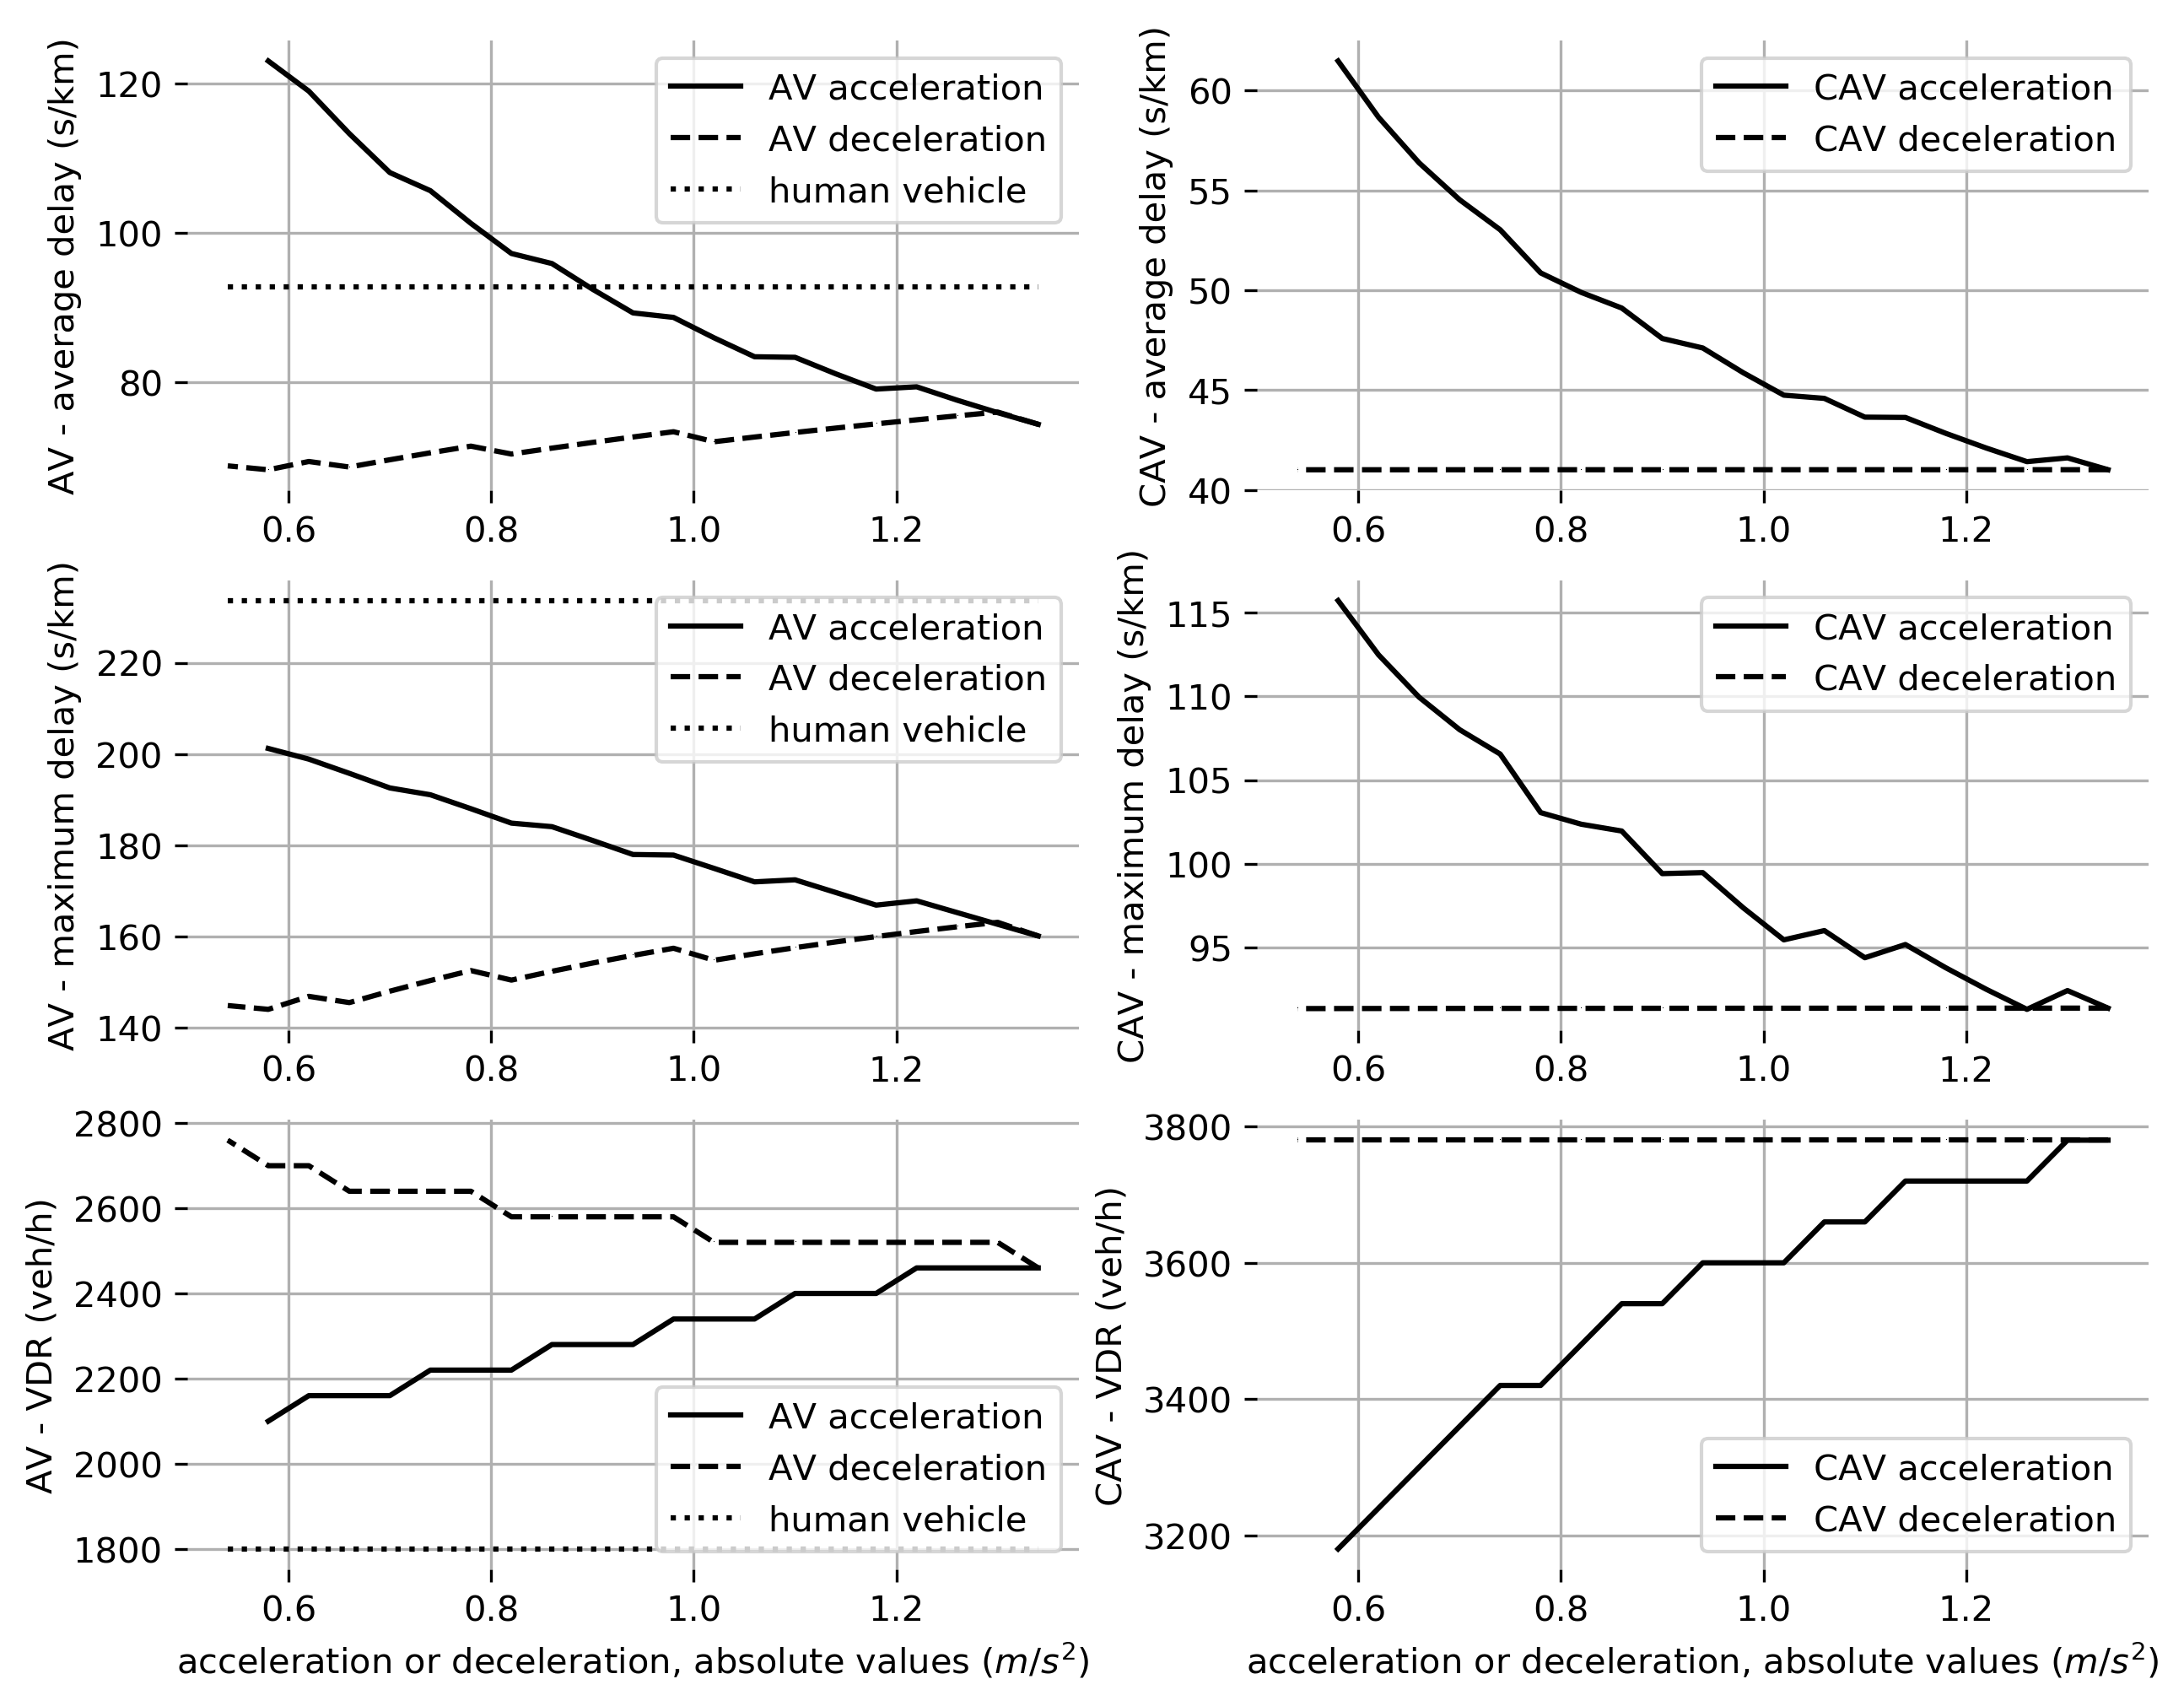

In [16]:
def get_xs_ys(df):
    sample_delay_fix_dec = df.values[0]
    sample_delay_fix_acc = np.array(df['1.34'])
    y1 = sample_delay_fix_dec
    y2 = sample_delay_fix_acc
    x1 = np.float64(df.columns)
    x2 = np.float64(np.abs(df.index))
    return  x1,y1,x2,y2

plt.figure(figsize=(10,8))
plt.subplot(3,2,1)
x1,y1,x2,y2 = get_xs_ys(av_avg_delay)
# plt.xlabel("acceleration or deceleration, absolute values "+ r"$(m/s^{2})$")
plt.ylabel("AV - average delay (s/km)")
plt.plot(x1, y1, label = "AV acceleration")
plt.plot(x2, y2, label = "AV deceleration")
plt.hlines(y=human_avg_delay,xmax=1.34, xmin=0.54,label = "human vehicle", linestyles='dotted')
plt.legend(title='')
plt.subplot(3,2,2)
x1,y1,x2,y2 = get_xs_ys(cav_avg_delay)
# plt.xlabel("acceleration or deceleration, absolute values "+ r"$(m/s^{2})$")
plt.plot(x1, y1, label = "CAV acceleration")
plt.plot(x2, y2, label = "CAV deceleration")
# plt.hlines(y=human_avg_delay,xmax=1.34, xmin=0.54,label = "human vehicle", linestyles='dotted')
plt.ylabel("CAV - average delay (s/km)")
plt.legend(title='')
plt.subplot(3,2,3)
x1,y1,x2,y2 = get_xs_ys(av_max_delay)
# plt.xlabel("acceleration or deceleration, absolute values "+ r"$(m/s^{2})$")
plt.ylabel("AV - maximum delay (s/km)")
plt.plot(x1, y1, label = "AV acceleration")
plt.plot(x2, y2, label = "AV deceleration")
plt.hlines(y=human_max_delay,xmax=1.34, xmin=0.54,label = "human vehicle", linestyles='dotted')
plt.legend(title='')
plt.subplot(3,2,4)
x1,y1,x2,y2 = get_xs_ys(cav_max_delay)
# plt.xlabel("acceleration or deceleration, absolute values "+ r"$(m/s^{2})$")
plt.plot(x1, y1, label = "CAV acceleration")
plt.plot(x2, y2, label = "CAV deceleration")
# plt.hlines(y=human_max_delay,xmax=1.34, xmin=0.54,label = "human vehicle", linestyles='dotted')
plt.ylabel("CAV - maximum delay (s/km)")
plt.legend(title='')
plt.subplot(3,2,5)
x1,y1,x2,y2 = get_xs_ys(av_vdr)
plt.xlabel("acceleration or deceleration, absolute values "+ r"$(m/s^{2})$")
plt.ylabel("AV - VDR (veh/h)")
plt.plot(x1, y1, label = "AV acceleration")
plt.plot(x2, y2, label = "AV deceleration")
plt.hlines(y=human_vdr,xmax=1.34, xmin=0.54,label = "human vehicle", linestyles='dotted')
plt.legend(title='')
plt.subplot(3,2,6)
x1,y1,x2,y2 = get_xs_ys(cav_vdr)
plt.xlabel("acceleration or deceleration, absolute values "+ r"$(m/s^{2})$")
plt.plot(x1, y1, label = "CAV acceleration")
plt.plot(x2, y2, label = "CAV deceleration")
# plt.hlines(y=human_vdr,xmax=1.34, xmin=0.54,label = "human vehicle", linestyles='dotted')
plt.ylabel("CAV - VDR (veh/h)")
plt.legend(title='')

In [5]:
def cal_max_min_two_df(df1,df2):
    df1max = np.max(np.max(df1))
    df1min = np.min(np.min(df1))
    df2max = np.max(np.max(df2))
    df2min = np.min(np.min(df2))
    return max(df1max,df2max), min(df1min,df2min)
import seaborn as sns
sns.set()

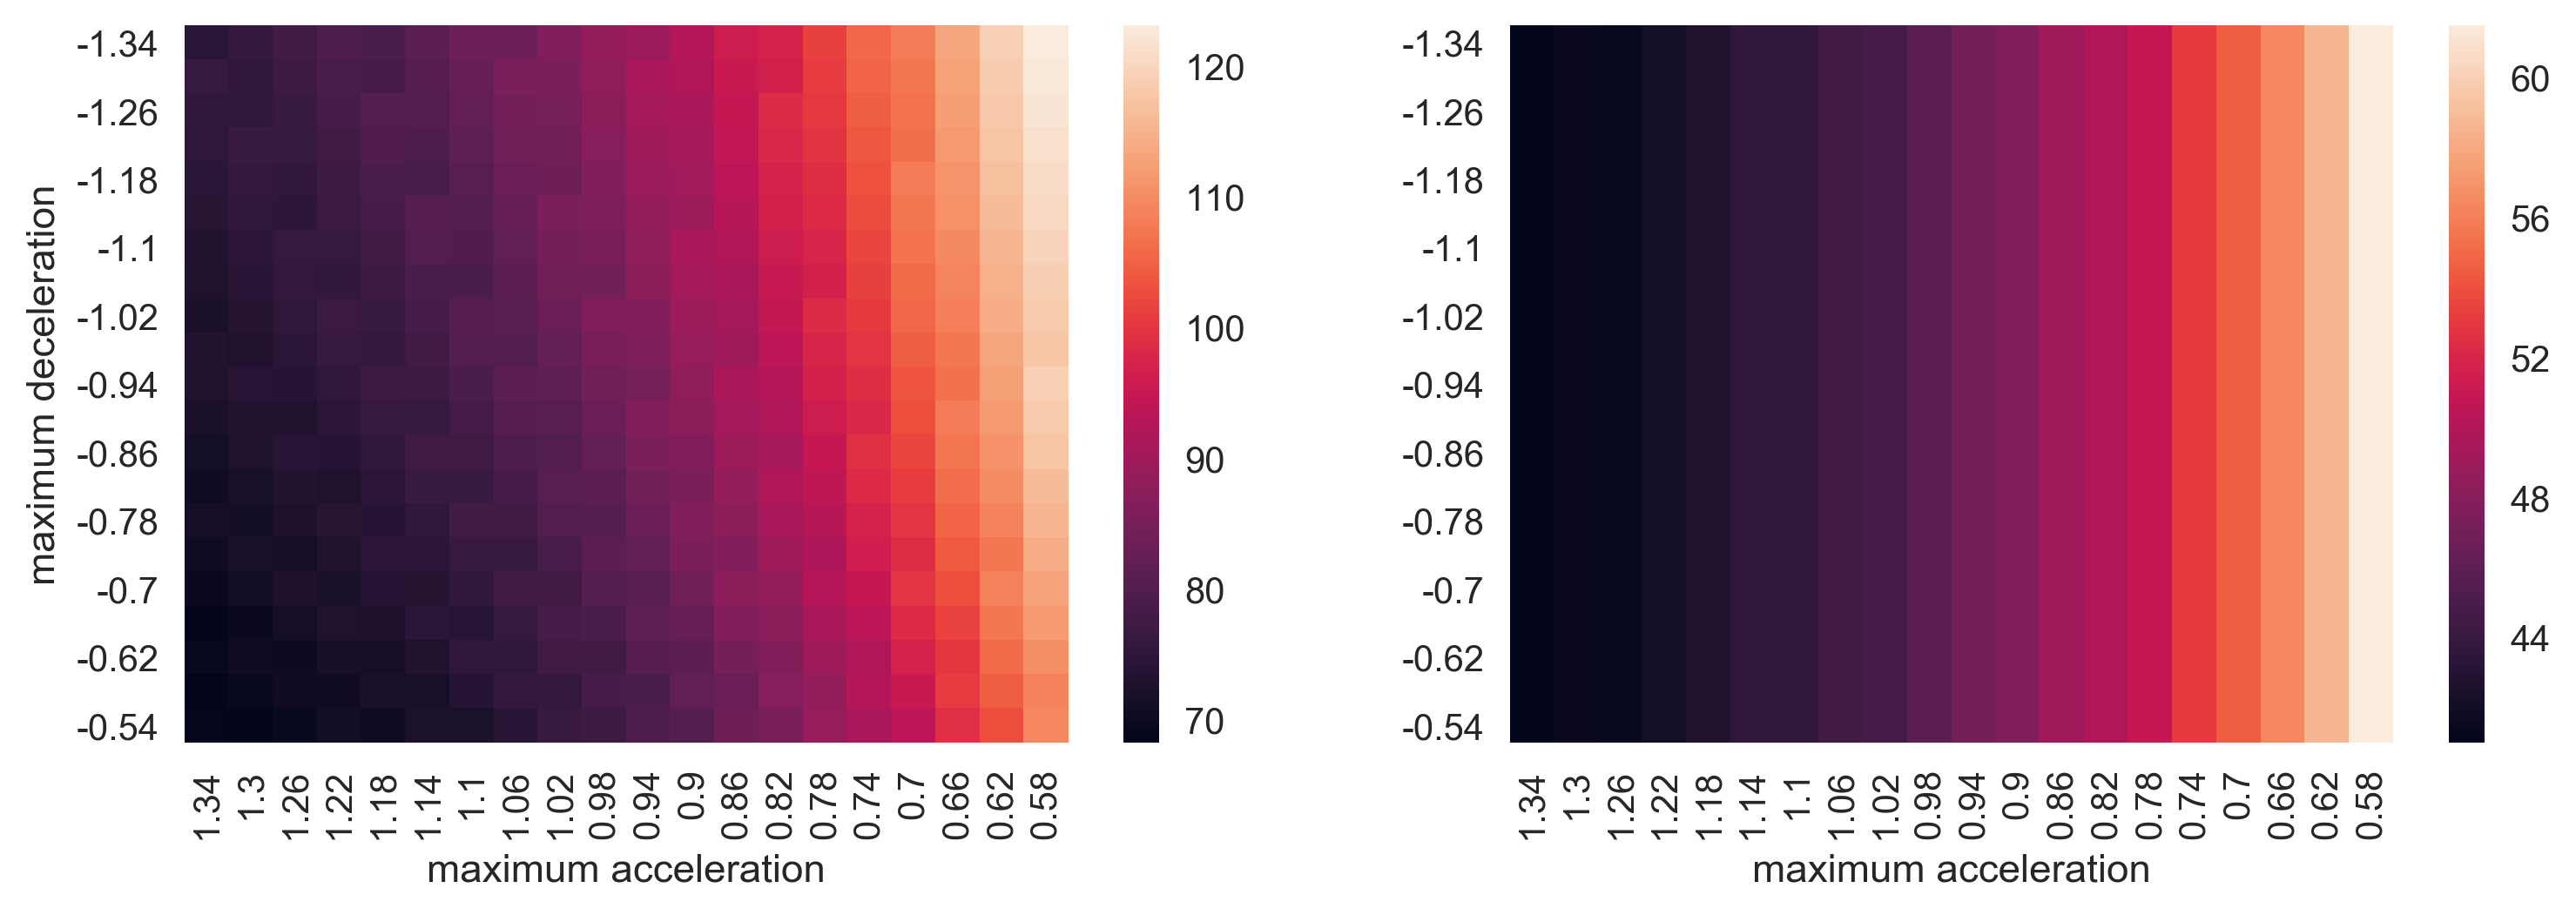

In [6]:
# maxvalue, minvalue =cal_max_min_two_df(av_avg_delay, cav_avg_delay) 
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
av_avg_delay.index.name = ylabel
av_avg_delay.columns.name = xlabel
sns.heatmap(av_avg_delay)
plt.subplot(2,2,2)
cav_avg_delay.columns.name = xlabel
sns.heatmap(cav_avg_delay)

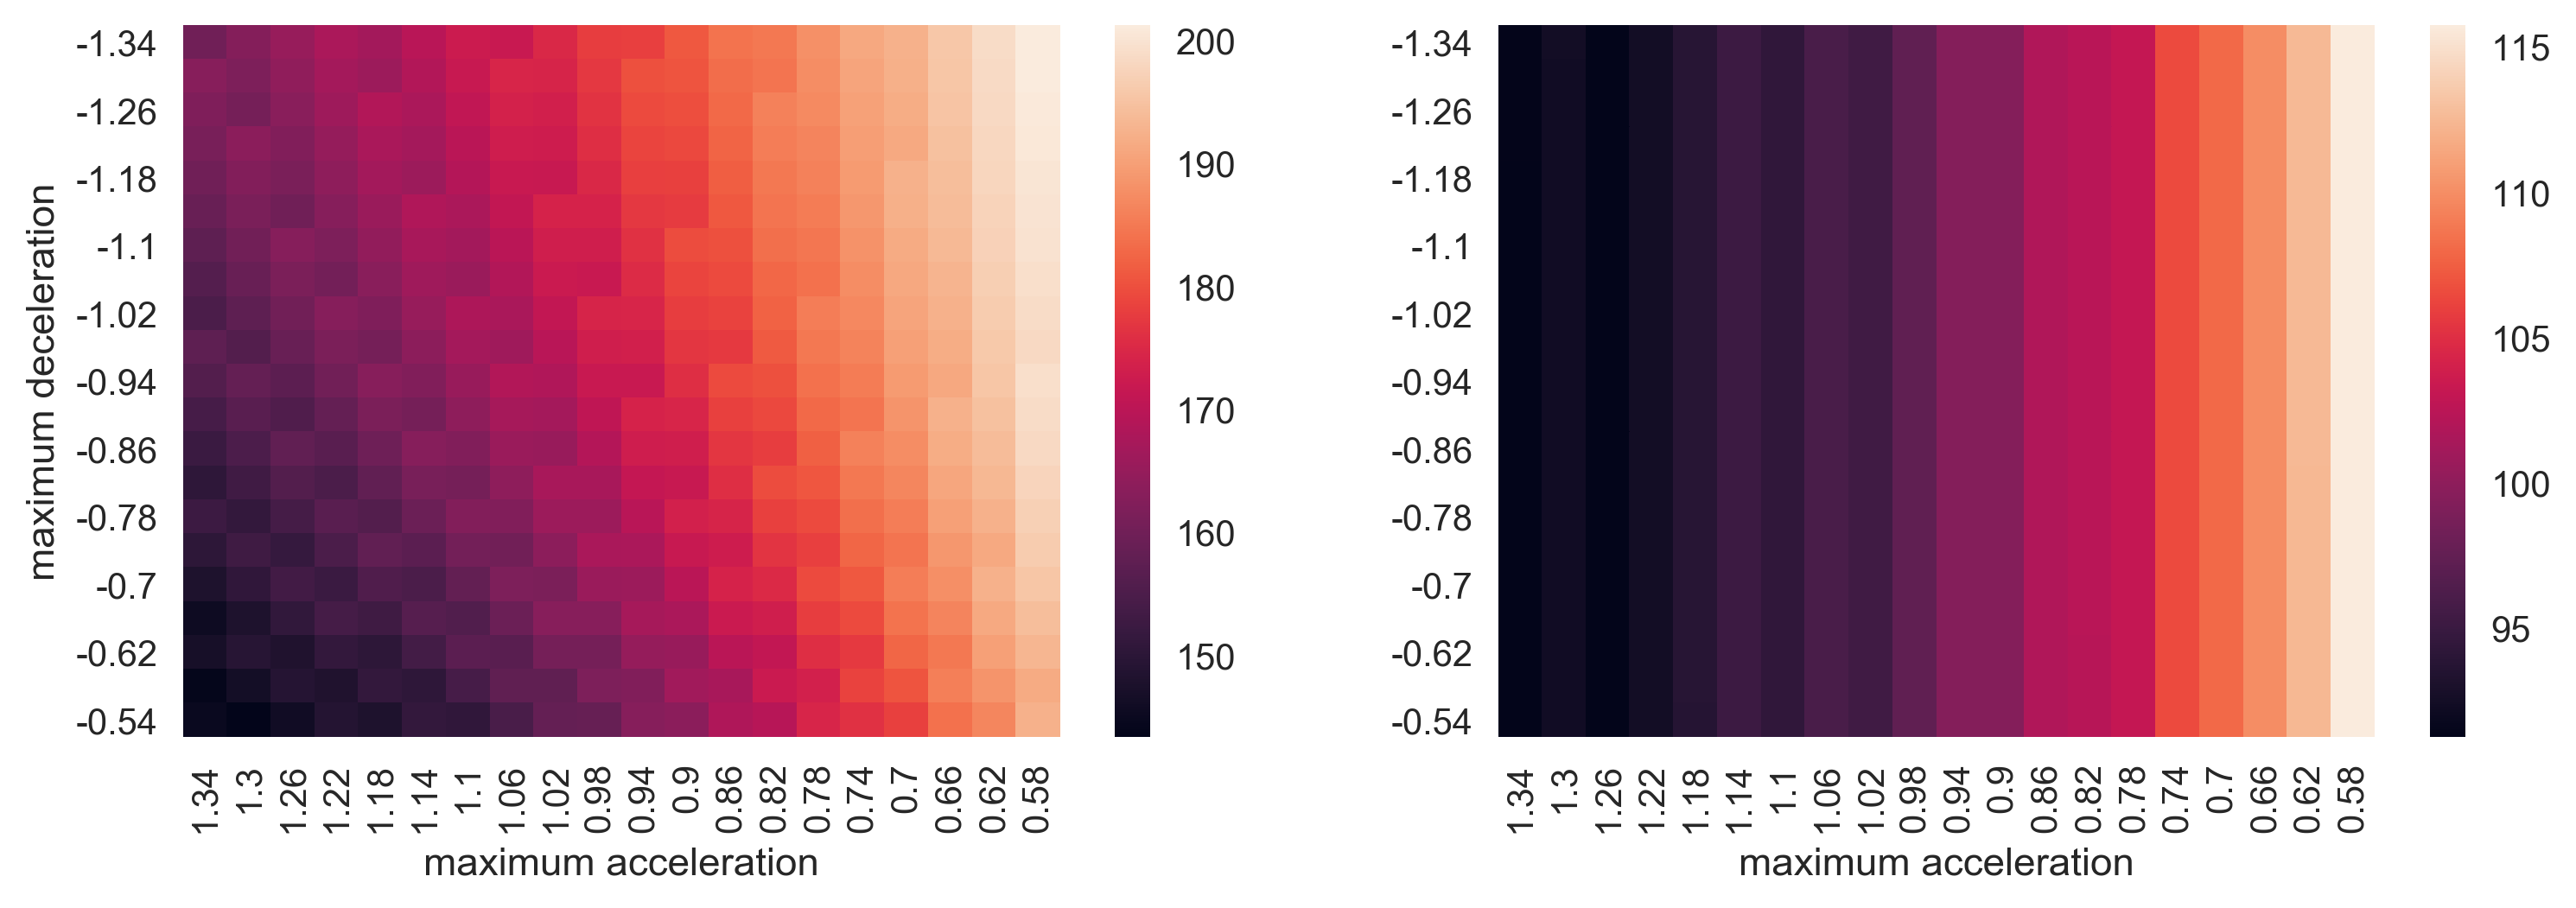

In [7]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
av_max_delay.index.name = ylabel
av_max_delay.columns.name = xlabel
sns.heatmap(av_max_delay)
plt.subplot(2,2,2)
cav_max_delay.columns.name = xlabel
sns.heatmap(cav_max_delay)

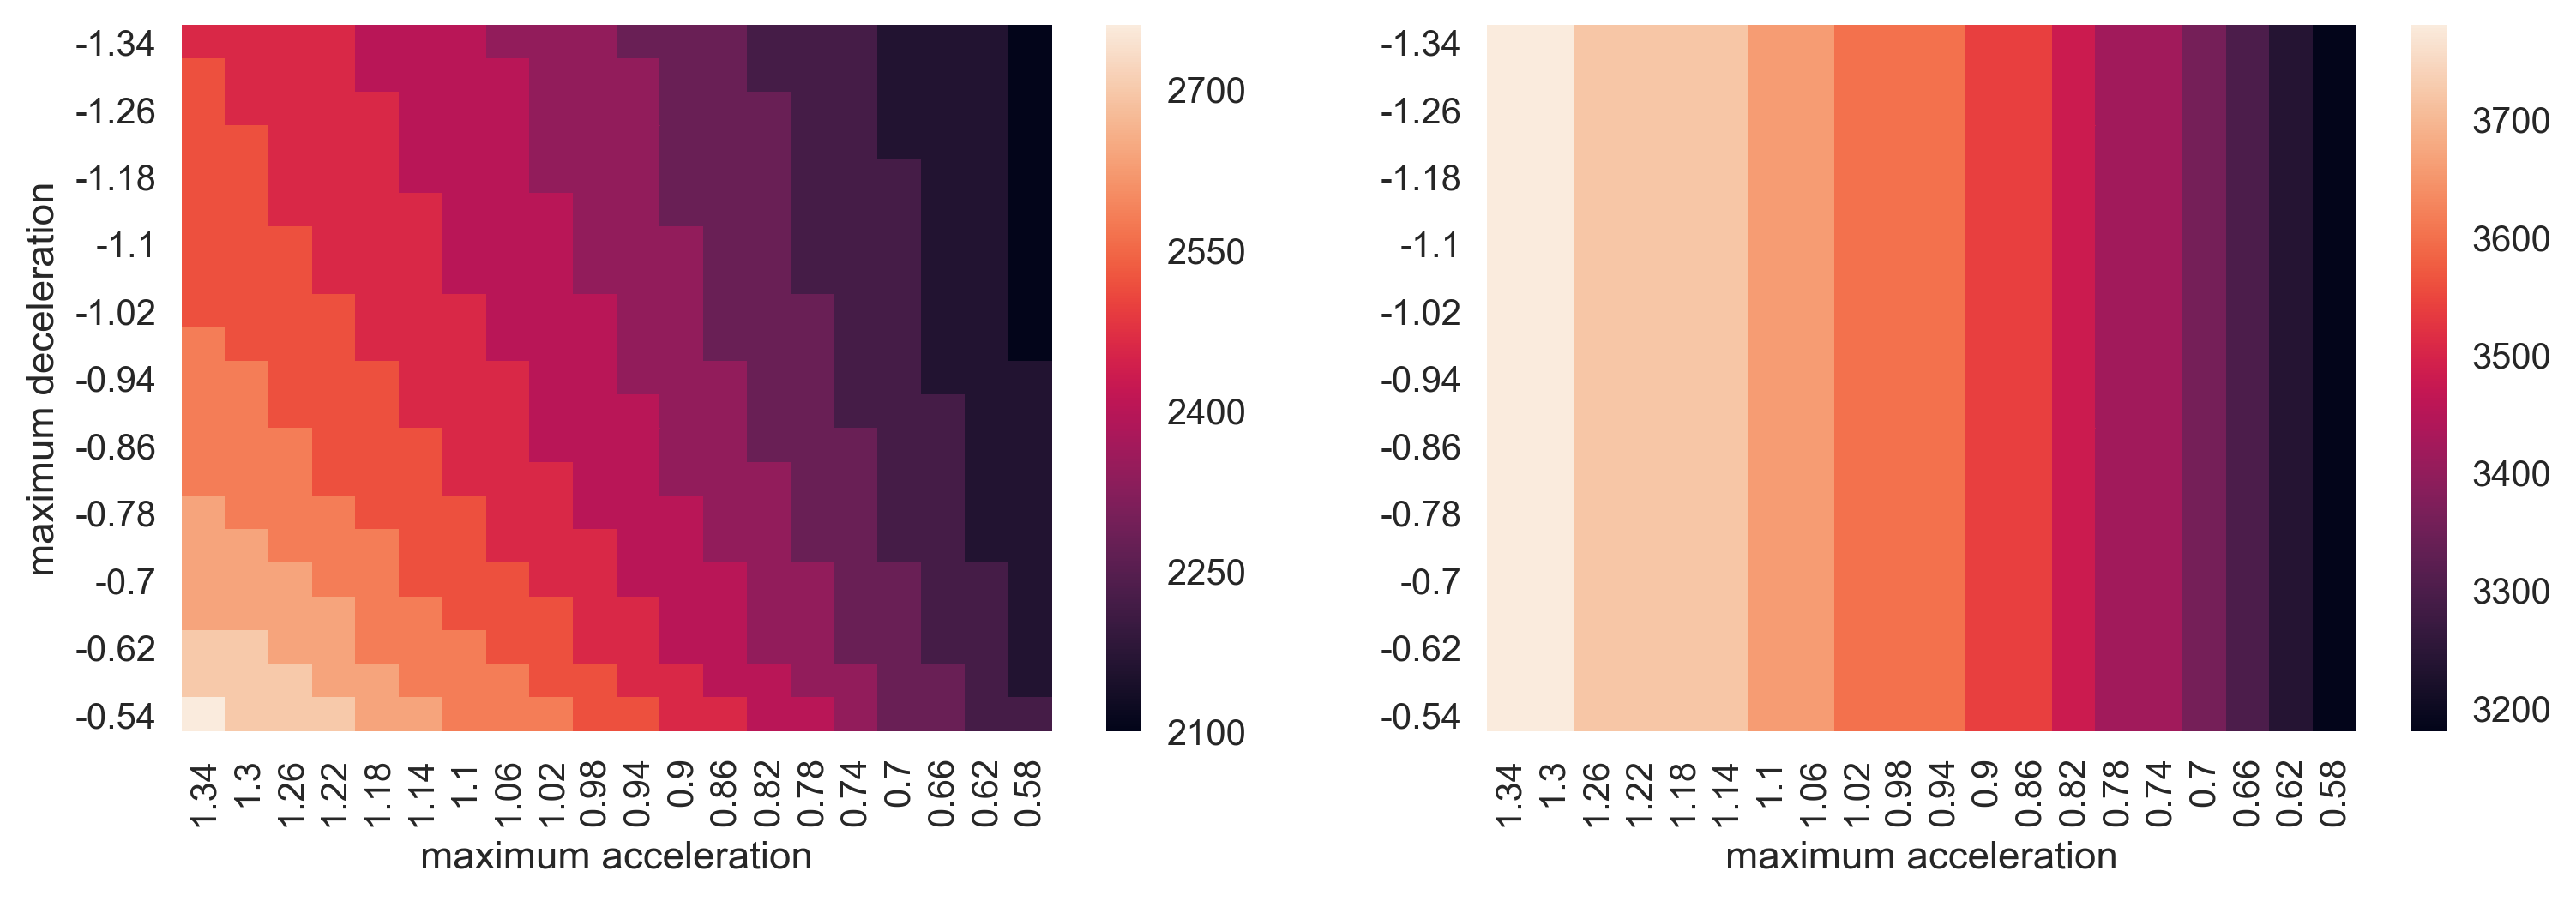

In [8]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
av_vdr.index.name = ylabel
av_vdr.columns.name = xlabel
sns.heatmap(av_vdr)
plt.subplot(2,2,2)
cav_vdr.columns.name = xlabel
sns.heatmap(cav_vdr)